Step 1: Importing Rrquired Libraries


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Data Processing

In [33]:
# Use this line for newer pandas versions:
df = pd.read_csv('/content/train.csv', on_bad_lines='warn')
print("DataSet Shape: ", df.shape)
df.head()

DataSet Shape:  (130511, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,1,1.0,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


Calculate Correlation between Specific Variables

Correlation Matrix: 
                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000021 -0.003511                 0.006542
var38                    0.000021  1.000000  0.007696                 0.014088
var15                   -0.003511  0.007696  1.000000                 0.092772
imp_op_var39_comer_ult1  0.006542  0.014088  0.092772                 1.000000


<Figure size 700x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

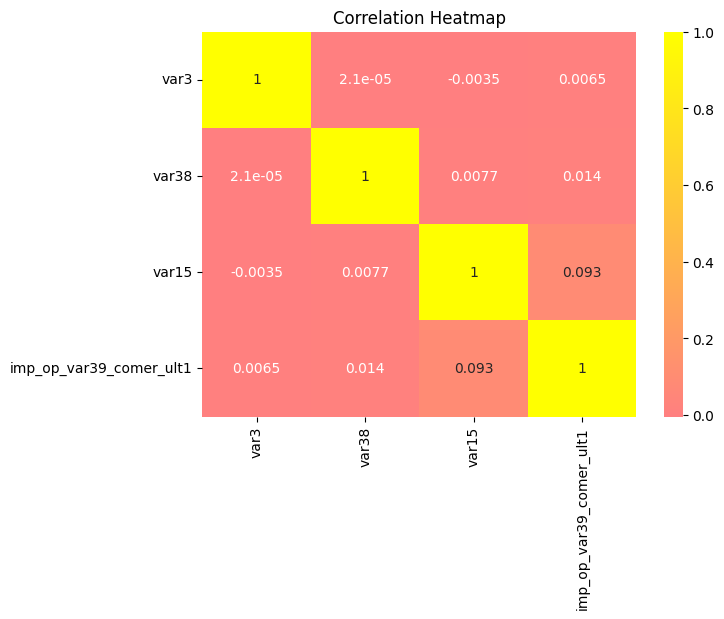

In [34]:
#specific variables
corr_var = df[['var3','var38','var15', 'imp_op_var39_comer_ult1']]
#correlation matrix
corr_mat = corr_var.corr()

print("Correlation Matrix: ")
print(corr_mat)

plt.figure(figsize=(7,5))
sns.heatmap(corr_mat, annot=True, cmap='spring', center=0)
plt.title("Correlation Heatmap")
plt.show()


Check for Linearity and Analysis

Text(0.5, 1.02, 'Pairplot for Linearity Check')

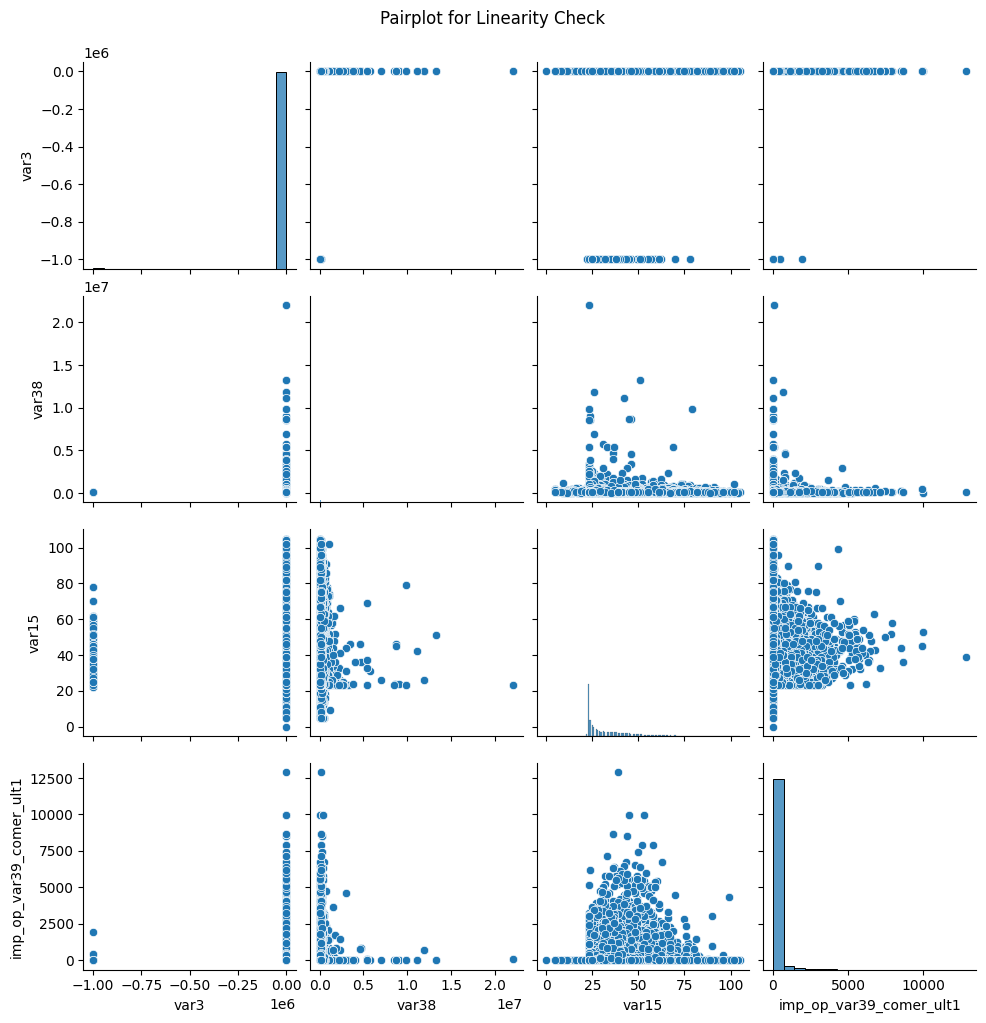

In [35]:
#Linearity using scatterplots
sns.pairplot(corr_var, palette='spring')
plt.suptitle("Pairplot for Linearity Check", y=1.02)
plt.show()

**Brief Explanation:**
I analyzed the pairplot to check for linear relationships between the variables. For example, if the scatter plot between Var15 and imp_op_var39_comer_ult1 shows points forming a straight line pattern, it indicates linearity. If the points are scattered randomly without any pattern, the relationship is non-linear. From the plot, I observe that [state your observation here, e.g., most variables do not show strong linear relationships].

Handle Missing Values

In [36]:
# Missing Values
print("Missing Values Before any form of data processing: ")
print(df.isnull().sum())

# Perform imputation using mean
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy = 'mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

#After Imputation
print("\nMissing Values After Imputation: ")
print(df.isnull().sum())

Missing Values Before any form of data processing: 
ID                          0
var3                        0
var15                       0
imp_ent_var16_ult1          0
imp_op_var39_comer_ult1     0
                           ..
saldo_medio_var44_hace3    39
saldo_medio_var44_ult1     39
saldo_medio_var44_ult3     39
var38                      39
TARGET                     39
Length: 371, dtype: int64

Missing Values After Imputation: 
ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


Multi-Variable Exploration

In [37]:
print("Summary Statistics for Numeric Variables: ")
df.describe()

Summary Statistics for Numeric Variables: 


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.00000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.0,130511.0,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,...,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,1.305110e+05,130511.000000,1.305110e+05,1.305110e+05,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,1.305110e+05,1.305110e+05,130511.000000,130511.0,130511.000000,130511.00000,1.305110e+05,1.305110e+05,1.305110e+05,1.305110e+05,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.000000,130511.00000,130511.000000,130511.000000,1.305110e+05,130511.000000
mean,84920.115500,-1476.086292,33.216135,85.677293,72.116032,118.779478,3.399092,6.218081,0.357643,0.507622,2.930849,68.71694,112.561397,68.363671,113.292998,137.438305,68.721299,113.800620,140.369154,4.458682,0.011455,0.003640,0.0,0.0,0.957988,0.663936,0.000077,0.000015,0.032733,0.028519,0.067366,0.045138,0.052517,0.043153,0.041667,0.010275,0.010053,0.000092,0.000046,0.051245,...,1077.349459,1051.144203,69.290747,8.390310,124.335596,109.931599,3.915106e+03,594.772239,5.627011e+03,4.345640e+03,3648.131392,563.465079,4867.872728,3873.135505,778.738801,163.441665,9.762845e+02,7.660303e+02,0.144965,0.0,0.367887,1.53439,7.042672e+01,2.387644e+01,1.131326e+02,9.346749e+01,0.204544,0.002226,0.147939,0.108740,8.939233,1.493433,12.969738,9.366082,28.514095,1.78916,72.569080,54.819912,1.172262e+05,0.039457
std,40489.840748,38426.971977,12.967196,1545.769803,338.668878,541.524619,89.776630,149.302024,25.729164,32.390026,90.750166,319.69632,509.391492,534.341155,980.909606,701.145543,537.289661,983.945924,715.602656,363.522933,0.106414,0.060219,0.0,0.0,0.200617,0.472363,0.008753,0.003915,0.177937,0.166450,0.250656,0.207607,0.223067,0.203203,0.199943,0.101977,0.099759,0.025370,0.009589,0.227678,...,9639.510099,8060.487061,1712.548314,448.430428,2172.659671,1914.305462,3.628

<Figure size 700x500 with 0 Axes>

<Axes: xlabel='var15', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Variable 15 (Var15)')

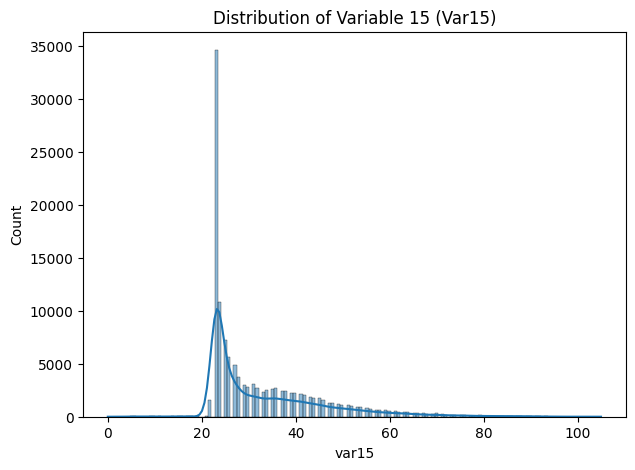

In [38]:
# Key Variable Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['var15'], palette= 'spring' , kde=True)
plt.title("Distribution of Variable 15 (Var15)")
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap for Entire Dataset')

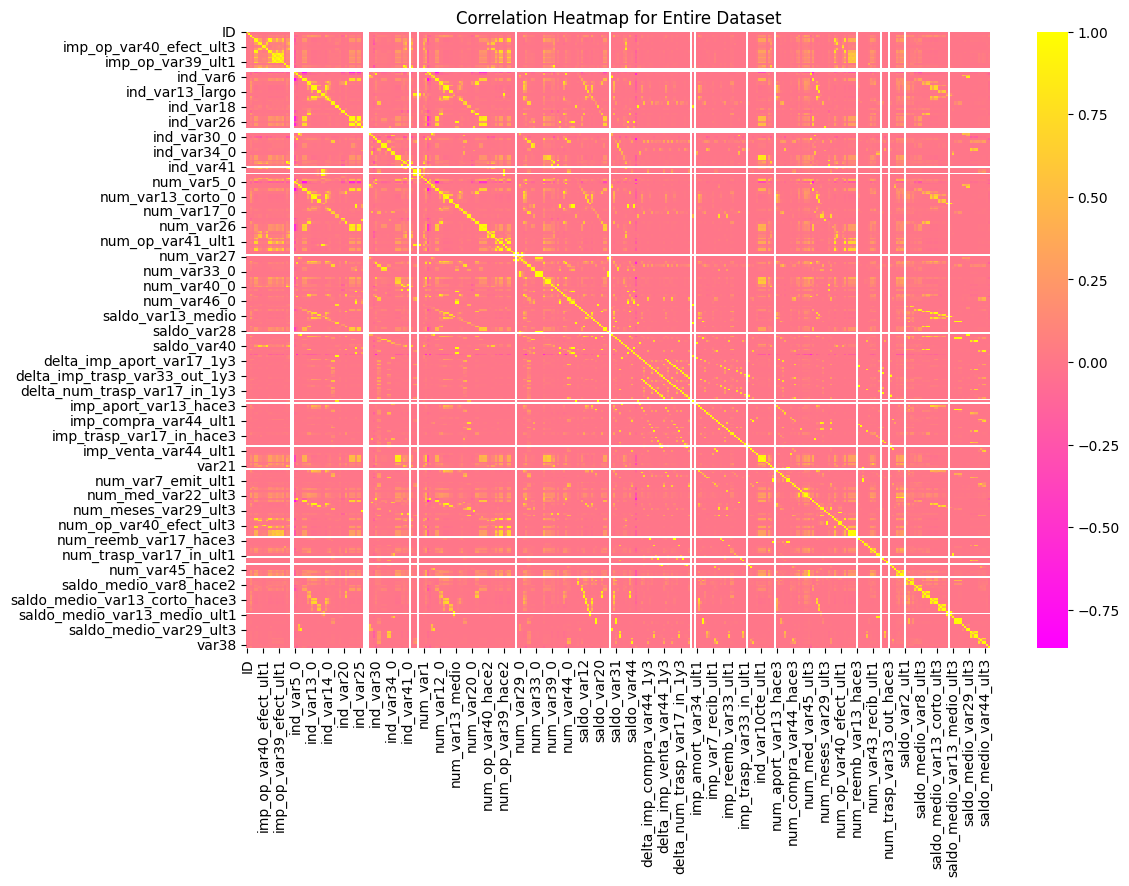

In [39]:
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='spring')
plt.title("Correlation Heatmap for Entire Dataset")
plt.show()

Check Balance of Target Variable


Target Variable (TARGET) Analysis:
count    130511.000000
mean          0.039457
std           0.194651
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


<Figure size 1200x400 with 0 Axes>

<Axes: >

<Axes: xlabel='TARGET', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of TARGET Variable')

<Axes: >

<Axes: ylabel='TARGET'>

Text(0.5, 1.0, 'Boxplot of TARGET Variable')

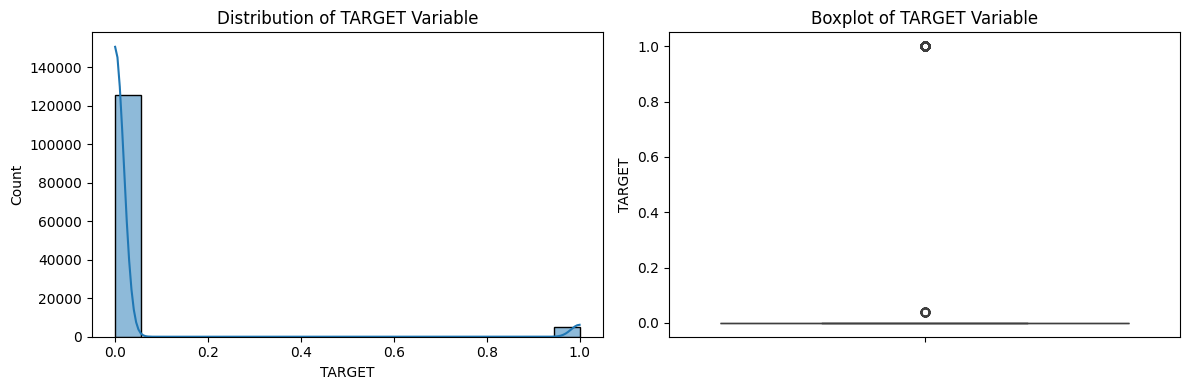


The TARGET variable contains continuous values (regression problem).
Dataset balance concept doesn't apply here as it would for classification.


In [43]:
# G. Analyze the target variable distribution (REGRESSION)
print("Target Variable (TARGET) Analysis:")
print(df['TARGET'].describe())

# Plot the distribution of the continuous target variable
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['TARGET'],palette= 'spring' kde=True)
plt.title("Distribution of TARGET Variable")

# Boxplot to check for outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['TARGET'])
plt.title("Boxplot of TARGET Variable")

plt.tight_layout()
plt.show()

# Since this is regression, we don't check "balance" in the classification sense
# But we can check if the target values are normally distributed
print("\nThe TARGET variable contains continuous values (regression problem).")
print("Dataset balance concept doesn't apply here as it would for classification.")

Handle Imbalance with Upsampling

In [44]:
# H. Skip this part for regression problems
print("Skipping oversampling/undersampling - not applicable for regression problems.")
print("The target variable TARGET contains continuous values, not discrete classes.")



Skipping oversampling/undersampling - not applicable for regression problems.
The target variable TARGET contains continuous values, not discrete classes.


Feature Selection using Pearson Correlation 65%

In [46]:
# Calculate correlation with target
corr_with_target = df.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False)

# Set threshold (65%)
threshold = 0.65
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

print("Number of features before selection:", df.shape[1])
print("Selected features with correlation > 65%:", selected_features)
print("Number of features after selection:", len(selected_features))

# Create new dataset with selected features
df_pearson = df[selected_features]

Number of features before selection: 371
Selected features with correlation > 65%: ['TARGET']
Number of features after selection: 1


Alternative Feature Selection - SelectKBest

In [47]:
# Make a copy of the dataset
df_copy = df.copy()

# Use SelectKBest with f_classif (ANOVA F-value)
X = df_copy.drop('TARGET', axis=1)
y = df_copy['TARGET']

# Select top 10 features (you can change k)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_mask = selector.get_support()
selected_features_alt = X.columns[selected_mask].tolist()

print("Features selected by SelectKBest:", selected_features_alt)

# Create new dataset with these features
df_alt = df_copy[selected_features_alt + ['TARGET']]

Features selected by SelectKBest: ['ind_var27_0', 'ind_var34_0', 'ind_var34', 'num_var29', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'num_meses_var12_ult3', 'num_meses_var13_medio_ult3', 'num_op_var39_comer_ult1']
